In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
import seaborn as sns
import random
from collections import Counter
from pprint import pprint
from tabulate import tabulate

In [2]:
data = sio.loadmat('covertype_release/covtype_reduced.mat')

In [3]:
data

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Wed Oct 14 18:35:15 2020',
 '__version__': '1.0',
 '__globals__': [],
 'X_test': array([[2.596e+03, 5.100e+01, 3.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.590e+03, 5.600e+01, 2.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.804e+03, 1.390e+02, 9.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        ...,
        [2.960e+03, 1.190e+02, 1.000e+01, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.954e+03, 1.380e+02, 1.200e+01, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.950e+03, 1.650e+02, 1.400e+01, ..., 0.000e+00, 0.000e+00,
         0.000e+00]]),
 'X_train': array([[2410.,   67.,   14., ...,    0.,    0.,    0.],
        [2739.,   90.,   25., ...,    0.,    0.,    0.],
        [3172.,    9.,    7., ...,    0.,    0.,    0.],
        ...,
        [2910.,  117.,   15., ...,    0.,    0.,    0.],
        [3204.,  240.,   17., ...,    0.,    0.,  

In [4]:
# XTrain = data['X_train']
# yTrain = data['y_train'][0]

# XTest = data['X_test']
# yTest = data['y_test'][0]

tree = decisionTreeAlgorithm(XTrain, yTrain)
accuracy = calculateAccuracy(XTest,yTest, tree)


tree = decisionTreeAlgorithm(train)
accuracy = calculateAccuracy(test, tree)

In [5]:
XTrain = data['X_train']
yTrain = data['y_train']

XTest = data['X_test']
yTest = data['y_test']

train = np.concatenate((XTrain, yTrain.T),axis=1)
test  = np.concatenate((XTest,  yTest.T), axis=1)

In [6]:
print("Shape of XTrain: "+str(np.shape(XTrain)))
print("Shape of yTrain: "+str(np.shape(yTrain)))
print("Shape of combinedTrain: "+str(np.shape(train)))

print("Shape of XTest: "+str(np.shape(XTest)))
print("Shape of yTest: "+str(np.shape(yTest)))
print("Shape of combinedTest: "+str(np.shape(test)))

Shape of XTrain: (468, 54)
Shape of yTrain: (1, 468)
Shape of combinedTrain: (468, 55)
Shape of XTest: (116202, 54)
Shape of yTest: (1, 116202)
Shape of combinedTest: (116202, 55)


In [7]:
trainDf = pd.DataFrame(train)
columns = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'label']
trainDf.columns = columns

In [8]:
pd.set_option('display.max_columns', None)
trainDf.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,label
0,2410.0,67.0,14.0,60.0,-8.0,1677.0,233.0,212.0,109.0,319.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,2739.0,90.0,25.0,210.0,95.0,210.0,248.0,192.0,59.0,743.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,3172.0,9.0,7.0,30.0,2.0,1773.0,212.0,225.0,151.0,402.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2685.0,335.0,23.0,360.0,169.0,990.0,163.0,203.0,176.0,630.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
4,3131.0,305.0,8.0,258.0,21.0,1909.0,199.0,236.0,176.0,2657.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [9]:
## To check there are no null values
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 55 columns):
Elevation                             468 non-null float64
Aspect                                468 non-null float64
Slope                                 468 non-null float64
Horizontal_Distance_To_Hydrology      468 non-null float64
Vertical_Distance_To_Hydrology        468 non-null float64
Horizontal_Distance_To_Roadways       468 non-null float64
Hillshade_9am                         468 non-null float64
Hillshade_Noon                        468 non-null float64
Hillshade_3pm                         468 non-null float64
Horizontal_Distance_To_Fire_Points    468 non-null float64
Wilderness_Area1                      468 non-null float64
Wilderness_Area2                      468 non-null float64
Wilderness_Area3                      468 non-null float64
Wilderness_Area4                      468 non-null float64
Soil_Type1                            468 non-null float64
Soil_Type2

### Data purity

In [10]:
def checkPurity(data):
    labelColumn = train[:,-1]
    uniqueClasses = np.unique(labelColumn)
    if len(uniqueClasses) == 1:
        return True
    else:
        return False

### Classify

In [11]:
def classifyData(data):
    labelColumn = train[:,-1]
    uniqueClasses, uniqueClassesFrequency = np.unique(labelColumn, return_counts=True)
    index = uniqueClassesFrequency.argmax()
    classification = uniqueClasses[index]
    return classification

### Potenrial Splits

In [12]:
trainDf.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,label
0,2410.0,67.0,14.0,60.0,-8.0,1677.0,233.0,212.0,109.0,319.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,2739.0,90.0,25.0,210.0,95.0,210.0,248.0,192.0,59.0,743.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,3172.0,9.0,7.0,30.0,2.0,1773.0,212.0,225.0,151.0,402.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2685.0,335.0,23.0,360.0,169.0,990.0,163.0,203.0,176.0,630.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
4,3131.0,305.0,8.0,258.0,21.0,1909.0,199.0,236.0,176.0,2657.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [13]:
def getPotentialSplits(data):    
    
    poterntialSplits = {}
    totalColumns = np.shape(data)[1]
    
    for columnIndex in range(totalColumns -1):
        poterntialSplits[columnIndex] = []
        values = data[:, columnIndex]
        values.sort()
        uniqueValues = np.unique(values)
                
        # For debugging
        if len(uniqueValues) == 0:
            print("Something is Fishy in the method getPotentialSplits")
            
        # For categorical data
        if len(uniqueValues) == 1:
            if uniqueValues[0] == 0:
                poterntialSplits[columnIndex].append(0.1)
            else:
                poterntialSplits[columnIndex].append(1.1)
            continue                            
                
        for index in range(1,len(uniqueValues)):        
                currentValue  = uniqueValues[index]
                previousValue = uniqueValues[index-1]
                potentialSplit = (currentValue + previousValue) /2                
                poterntialSplits[columnIndex].append(potentialSplit)        
    
    return poterntialSplits

In [14]:
data = train
potentialSplits = getPotentialSplits(data)

In [15]:
trainDf.head(2)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,label
0,2061.0,0.0,1.0,0.0,-75.0,85.0,110.0,129.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,2075.0,0.0,1.0,0.0,-57.0,95.0,110.0,134.0,31.0,95.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


### Split Data

In [16]:
def splitData(data, splitColumn, splitValue):    
    splitColumnValues = data[:, splitColumn]
    dataBelow = data[splitColumnValues <= splitValue]
    dataAbove = data[splitColumnValues >  splitValue]    
    return dataBelow, dataAbove

### Lowest Overall Entropy

In [17]:
def calculateEntropy(data):
    
    labelColumn = data[:, -1]
    _, counts = np.unique(labelColumn, return_counts=True)    
    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))
     
    return entropy

In [18]:
def calculateOverallEntropy(dataBelow, dataAbove):
    
    n = len(dataBelow) + len(dataAbove)
    pDataBelow = len(dataBelow) / n
    pDataAbove = len(dataAbove) / n    
    overallEntropy =  (pDataBelow * calculateEntropy(dataBelow) + pDataAbove * calculateEntropy(dataAbove))
    
    return overallEntropy

In [19]:
dataBelow, dataAbove = splitData(train, 9, 599)
print(len(dataBelow), len(dataAbove))
calculateOverallEntropy(dataBelow, dataAbove)

53 415


1.7616808750367796

In [20]:
def determineBestSplit(data, potentialSplits):
    
    overallEntropy = float("inf")
    for columnIndex in potentialSplits:
        for value in potentialSplits[columnIndex]:
            dataBelow, dataAbove = splitData(data, columnIndex, splitValue=value)
            currentOverallEntropy = calculateOverallEntropy(dataBelow, dataAbove)

            if currentOverallEntropy <= overallEntropy:
                overallEntropy = currentOverallEntropy
                bestSplitColumn = columnIndex
                bestSplitValue = value
    
    return bestSplitColumn, bestSplitValue

In [21]:
potentialSplits = getPotentialSplits(train)
determineBestSplit(train, potentialSplits)

(9, 599.0)

In [22]:
trainContinuous = train[:,:9]
trainNew = np.concatenate((trainContinuous, yTrain.T),axis=1)
print(np.shape(trainNew))
potentialSplits = getPotentialSplits(trainNew)
determineBestSplit(trainNew, potentialSplits)

(468, 10)


(7, 198.5)

In [23]:
dataBelow, dataAbove = splitData(trainNew, 7, 198.5)
print(len(dataBelow), len(dataAbove))
print(calculateOverallEntropy(dataBelow, dataAbove))
print(calculateEntropy(data))

53 415
1.7616808750367796
1.7896384854519598


In [24]:
np.unique(dataBelow[:,-1], return_counts=True )

(array([1., 2., 3., 5., 6.]), array([31, 13,  7,  1,  1]))

In [25]:
np.unique(dataAbove[:,-1], return_counts=True )

(array([1., 2., 3., 4., 5., 6., 7.]),
 array([156, 191,  27,   1,   6,  15,  19]))

In [26]:
np.unique(trainNew[:,-1], return_counts=True )

(array([1., 2., 3., 4., 5., 6., 7.]),
 array([187, 204,  34,   1,   7,  16,  19]))

In [27]:
np.unique(train[:,-1], return_counts=True )

(array([1., 2., 3., 4., 5., 6., 7.]),
 array([187, 204,  34,   1,   7,  16,  19]))

In [28]:

np.unique(yTest, return_counts=True )

(array([1., 2., 3., 4., 5., 6., 7.]),
 array([25027, 79737,  2160,  2160,  2798,  2160,  2160]))

### Decision Tree Algorithm
#### Representation of the Decision Tree

In [29]:
sub_tree = {"question": ["yes_answer", 
                         "no_answer"]}

In [30]:
example_tree = {"petal_width <= 0.8": ["Iris-setosa", 
                                      {"petal_width <= 1.65": [{"petal_length <= 4.9": ["Iris-versicolor", 
                                                                                        "Iris-virginica"]}, 
                                                                "Iris-virginica"]}]}

### Algorithm

In [38]:
def decisionTreeAlgorithm(df, counter=0):
    
    # data preparations
    if counter == 0:
        data = df.values
    else:
        data = df           
    
    
    # base cases
    if checkPurity(data):
        classification = classifyData(data)
        return classification

    
    # recursive part
    else:    
        counter += 1

        # helper functions 
        potential_splits = getPotentialSplits(data)
        split_column, split_value = determineBestSplit(data, potential_splits)
        data_below, data_above = splitData(data, split_column, split_value)
        
        # instantiate sub-tree
        question = "{} <= {}".format(split_column, split_value)
        sub_tree = {question: []}
        
        # find answers (recursion)
        yes_answer = decisionTreeAlgorithm(data_below, counter)
        no_answer = decisionTreeAlgorithm(data_above, counter)
        
        sub_tree[question].append(yes_answer)
        sub_tree[question].append(no_answer)
        
        return sub_tree

In [79]:
def decision_tree_algorithm(df, counter=0, min_samples=2, max_depth=5):
    
    # data preparations
    if counter == 0:
        global COLUMN_HEADERS
        COLUMN_HEADERS = df.columns
        data = df.values
    else:
        data = df           
    
    
    # base cases
    if (checkPurity(data)) or (len(data) < min_samples) or (counter == max_depth):
        classification = classifyData(data)
        
        return classification

    
    # recursive part
    else:    
        counter += 1

        # helper functions 
        potential_splits = getPotentialSplits(data)
        split_column, split_value = determineBestSplit(data, potential_splits)
        data_below, data_above = splitData(data, split_column, split_value)
        
        # instantiate sub-tree
        feature_name = COLUMN_HEADERS[split_column]
        question = "{} <= {}".format(feature_name, split_value)
        sub_tree = {question: []}
        print(question)
        # find answers (recursion)
        yes_answer = decision_tree_algorithm(data_below, counter, min_samples, max_depth)
        no_answer = decision_tree_algorithm(data_above, counter, min_samples, max_depth)
        
        # If the answers are the same, then there is no point in asking the qestion.
        # This could happen when the data is classified even though it is not pure
        # yet (min_samples or max_depth base cases).
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)
        
        return sub_tree

In [80]:
trainContinuous = train[:,:10]
trainNew = np.concatenate((trainContinuous, yTrain.T),axis=1)
columns = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'label']
a = pd.DataFrame(trainNew)
a.columns = columns
# a = a[a[9]!=0]
# a = a[a[9]!=1]
# a = a[a[9]!=2]
# a = a[a[9]!=3]
# a = a[a[9]!=4]
# a = a[a[9]!=5]
# a = a[a[9]!=6]
np.shape(a)

(468, 11)

In [81]:
tree = decision_tree_algorithm(a, max_depth=3)
pprint(tree)

Horizontal_Distance_To_Fire_Points <= 599.0
Horizontal_Distance_To_Fire_Points <= 167.5
Horizontal_Distance_To_Fire_Points <= 122.5
Horizontal_Distance_To_Fire_Points <= 561.0
Horizontal_Distance_To_Fire_Points <= 1124.5
Horizontal_Distance_To_Fire_Points <= 821.5
Horizontal_Distance_To_Fire_Points <= 2344.0
2.0


In [75]:
a

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,label
0,2061.0,0.0,1.0,0.0,-75.0,85.0,110.0,129.0,0.0,30.0,3.0
1,2075.0,0.0,1.0,0.0,-57.0,95.0,110.0,134.0,31.0,95.0,5.0
2,2135.0,0.0,2.0,0.0,-50.0,124.0,112.0,153.0,32.0,150.0,1.0
3,2152.0,0.0,2.0,0.0,-42.0,124.0,121.0,158.0,32.0,153.0,6.0
4,2179.0,0.0,2.0,0.0,-39.0,127.0,133.0,158.0,38.0,182.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
463,3425.0,358.0,35.0,872.0,247.0,6037.0,253.0,253.0,228.0,3958.0,3.0
464,3429.0,359.0,36.0,932.0,259.0,6088.0,254.0,254.0,229.0,4015.0,2.0
465,3459.0,359.0,37.0,933.0,268.0,6114.0,254.0,254.0,231.0,4085.0,2.0
466,3523.0,359.0,37.0,957.0,292.0,6282.0,254.0,254.0,242.0,4430.0,2.0


In [87]:


graph {
  hello -- world;
}

SyntaxError: invalid syntax (<ipython-input-87-68b7de62bac0>, line 3)

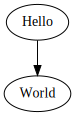

In [92]:
from graphviz import Digraph
g = Digraph('G')

g.edge('Hello', 'World')

g

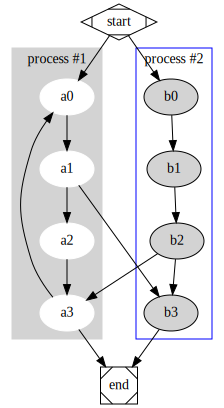

In [93]:
g = Digraph('G')

# NOTE: the subgraph name needs to begin with 'cluster' (all lowercase)
#       so that Graphviz recognizes it as a special cluster subgraph

with g.subgraph(name='cluster_0') as c:
    c.attr(style='filled', color='lightgrey')
    c.node_attr.update(style='filled', color='white')
    c.edges([('a0', 'a1'), ('a1', 'a2'), ('a2', 'a3')])
    c.attr(label='process #1')

with g.subgraph(name='cluster_1') as c:
    c.attr(color='blue')
    c.node_attr['style'] = 'filled'
    c.edges([('b0', 'b1'), ('b1', 'b2'), ('b2', 'b3')])
    c.attr(label='process #2')

g.edge('start', 'a0')
g.edge('start', 'b0')
g.edge('a1', 'b3')
g.edge('b2', 'a3')
g.edge('a3', 'a0')
g.edge('a3', 'end')
g.edge('b3', 'end')

g.node('start', shape='Mdiamond')
g.node('end', shape='Msquare')

g

In [94]:
import os

In [95]:
os.getcwd()

'/Users/mvsnbharath/Desktop/SBU/S3/ML 512/HW/hw4'